# Python Homework 1

**Release date:** Friday, April 3<br>
**Due date:** Friday, April 17, at midnight via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename __PythonHW1_YOURPERMNUMBER.ipynb__.


Load some packages:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1 (5 Points)

1. Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.1$ on the time interval $[0,100]$. 

In [5]:
process = 0
processPath = []
processPath.append(process)

while len(processPath) < 100:
    outcome = np.random.poisson(0.1)
    
    process = process + outcome
    
    processPath.append(process)

2. Plot a trajectory of your simulated process from part 1. 

Text(0.5, 1.0, 'Poisson process lambda=0.1')

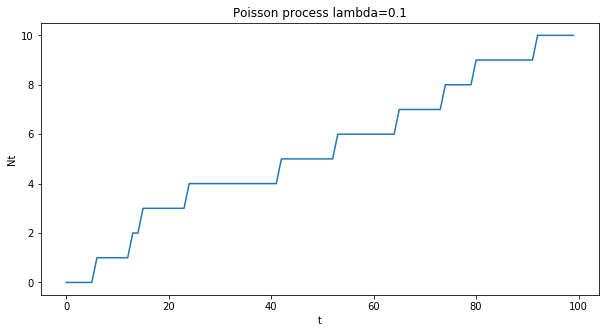

In [7]:
plt.figure(figsize=(10,5))
plt.plot(processPath)
plt.xlabel('t')
plt.ylabel('Nt')
plt.title('Poisson process lambda=0.1')


## Problem 2 (5 Points)

1. Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 30}$ (see __Lecture 4__) with parameter $\lambda=1/2$ on the time interval $[0,30]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normally distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 30}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 30}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 30}$.

Text(0.5, 1.0, 'Poisson process')

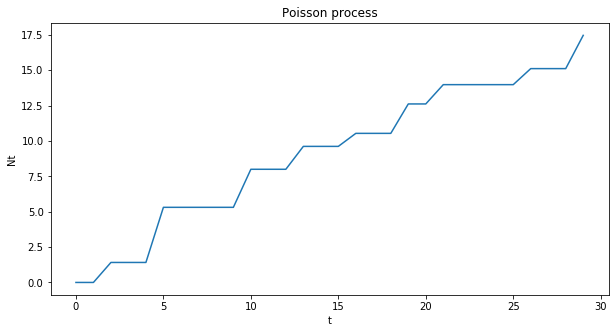

In [10]:
process = 0
processPath = []
processPath.append(process)

while len(processPath) < 30:
    Z = np.random.normal(0,1)
    jump_distribution = math.exp(Z)
    jump_intesity = np.random.poisson(0.5)*jump_distribution
    
    process = process + jump_intesity
    
    processPath.append(process)
    
# Plot
plt.figure(figsize=(10,5))
plt.plot(processPath)
plt.xlabel('t')
plt.ylabel('Nt')
plt.title('Poisson process')    

2. Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{30}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{30}] = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{30}) = \mathbb{E}[N_{30}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that 
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [76]:
def C_30():
    process = 0
    processPath = []
    processPath.append(process)

    while len(processPath) < 30:
        Z = np.random.normal(0,1)
        jump_distribution = math.exp(Z)
        jump_intesity = np.random.poisson(0.5)*jump_distribution

        process = process + jump_intesity

        processPath.append(process)

    return processPath[29]

In [85]:
C30 = []
M = 10000
for i in range(M):
    C30.append(C_30())

In [86]:
# E[C_30]
np.mean(C30)

23.839196415531838

In [89]:
# Empirical Mean
15*np.exp(0.5)

24.730819060501922

In [3]:
# Var(C_30)
np.std(C30)

NameError: name 'np' is not defined

In [90]:
# Empirical Variance
15*np.exp(2)

110.83584148395975